In [1]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt

plotting.setup_mpl()

In [2]:
session = ff1.get_session(2023, 'Belgian', 'SQ')
session.load()

api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for Belgian Grand Prix - Sprint [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api         WARNING 	Driver 241: Position data is incomplete!
api         WARNING 	Driver 242: Position data is incomplete!
api         WARNING 	Driver 243: Position data is incomplete!
api            INFO 	Fetching 

In [3]:
pia_lap = session.laps.pick_driver('PIA').pick_fastest()
ver_lap = session.laps.pick_driver('VER').pick_fastest()

pia_lap = pia_lap.get_car_data().add_distance()
ver_lap = ver_lap.get_car_data().add_distance()

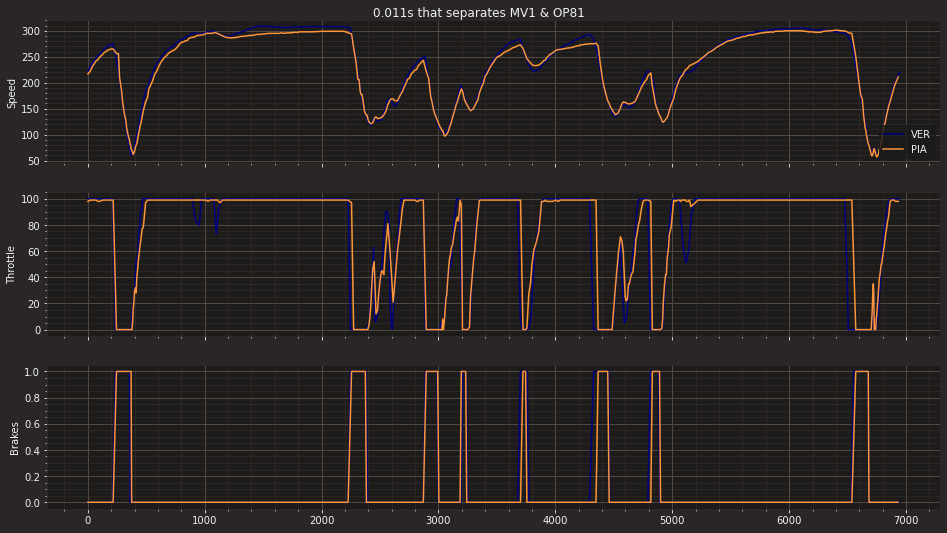

In [6]:
fig, ax = plt.subplots(3, figsize = (16, 9))
fig.suptitle("0.011s that separates MV1 & OP81", y=0.9)

ax[0].plot(ver_lap['Distance'], ver_lap['Speed'], color='navy', label='VER')
ax[0].plot(pia_lap['Distance'], pia_lap['Speed'], color='#FD963A', label='PIA')
ax[0].set(ylabel='Speed')
ax[0].legend(loc="lower right")

ax[1].plot(ver_lap['Distance'], ver_lap['Throttle'], color='navy', label='VER')
ax[1].plot(pia_lap['Distance'], pia_lap['Throttle'], color='#FD963A', label='PIA')
ax[1].set(ylabel='Throttle')

ax[2].plot(ver_lap['Distance'], ver_lap['Brake'], color='navy', label='VER')
ax[2].plot(pia_lap['Distance'], pia_lap['Brake'], color='#FD963A', label='PIA')
ax[2].set(ylabel='Brakes')

for a in ax.flat:
    a.label_outer()
    
plt.show()

In [7]:
fig.savefig('Belgian GP 2023 Sprint Qualifying - MV1 vs OP81.png', dpi = 600)